# Tabnet(비지도학습) 재구성 오류로 구간을 나누어 학습


In [13]:
import pandas as pd

In [85]:
train = pd.read_csv('../data/train.csv')
test  = pd.read_csv('../data/test.csv')

# fnlwgt 없애기
train = train.drop('fnlwgt', axis=1)
test  = test.drop('fnlwgt', axis=1)


In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25020 entries, 0 to 25019
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25020 non-null  int64 
 1   workclass       23184 non-null  object
 2   education       25020 non-null  object
 3   education.num   25020 non-null  int64 
 4   marital.status  25020 non-null  object
 5   occupation      23177 non-null  object
 6   relationship    25020 non-null  object
 7   race            25020 non-null  object
 8   sex             25020 non-null  object
 9   capital.gain    25020 non-null  int64 
 10  capital.loss    25020 non-null  int64 
 11  hours.per.week  25020 non-null  int64 
 12  native.country  24437 non-null  object
 13  income          25020 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 2.7+ MB


In [87]:
# train occupation 열의 고유값 출력
print(train['occupation'].unique())


['Exec-managerial' 'Other-service' 'Machine-op-inspct' 'Transport-moving'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Protective-serv' 'Tech-support'
 'Priv-house-serv' 'Armed-Forces' nan]


In [88]:
# Protective-serve 와 Armed-Forces의 개수 
print(train['occupation'].value_counts())


Prof-specialty       3115
Exec-managerial      3090
Craft-repair         3084
Adm-clerical         2829
Sales                2798
Other-service        2489
Machine-op-inspct    1510
Transport-moving     1197
Handlers-cleaners    1039
Farming-fishing       731
Tech-support          688
Protective-serv       481
Priv-house-serv       120
Armed-Forces            6
Name: occupation, dtype: int64


In [89]:
#train 에서 결측인 데이터중 income이 1인 데이터를 찾아

train.loc[train['income'] == 1].isnull().sum()


age                 0
workclass         191
education           0
education.num       0
marital.status      0
occupation        191
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    146
income              0
dtype: int64

In [90]:
# 결측행 모두 제거 
train = train.dropna()
test = test.dropna()


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22621 entries, 0 to 22620
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22621 non-null  int64 
 1   workclass       22621 non-null  object
 2   education       22621 non-null  object
 3   education.num   22621 non-null  int64 
 4   marital.status  22621 non-null  object
 5   occupation      22621 non-null  object
 6   relationship    22621 non-null  object
 7   race            22621 non-null  object
 8   sex             22621 non-null  object
 9   capital.gain    22621 non-null  int64 
 10  capital.loss    22621 non-null  int64 
 11  hours.per.week  22621 non-null  int64 
 12  native.country  22621 non-null  object
 13  income          22621 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 2.6+ MB


In [93]:
# encoding

train = pd.get_dummies(train)
test = pd.get_dummies(test)


In [94]:
# train, test 열 맞추기
train, test = train.align(test, join='inner', axis=1)

In [25]:
# tabnet 
from pytorch_tabnet.pretraining import TabNetPretrainer


# split 
X_train = train.drop(columns=['income'])
y_train = train['income']


X_test = test.drop(columns=['income'])
y_test = test['income']

# TabNet 비지도 학습 모델 설정
unsupervised_model = TabNetPretrainer()

# 모델 학습
unsupervised_model.fit(
    X_train=train.values,
    max_epochs=100,        # 에포크 수 조정 (patience에 따라 일찍 종료 가능)
    patience=10,          # patience를 증가시켜서 충분한 학습 시간 확보
    batch_size=512,       # 배치 크기 감소 (메모리 사용량 조절)
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
)



/opt/homebrew/Caskroom/miniforge/base/envs/sundo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/opt/homebrew/Caskroom/miniforge/base/envs/sundo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 48.03063|  0:00:00s
epoch 1  | loss: 1.23461 |  0:00:01s
epoch 2  | loss: 1.11175 |  0:00:02s
epoch 3  | loss: 1.06571 |  0:00:02s
epoch 4  | loss: 1.00958 |  0:00:03s
epoch 5  | loss: 1.00574 |  0:00:03s
epoch 6  | loss: 0.95454 |  0:00:04s
epoch 7  | loss: 0.90155 |  0:00:05s
epoch 8  | loss: 0.90654 |  0:00:05s
epoch 9  | loss: 0.85463 |  0:00:06s
epoch 10 | loss: 0.89601 |  0:00:07s
epoch 11 | loss: 0.89979 |  0:00:07s
epoch 12 | loss: 0.88703 |  0:00:08s
epoch 13 | loss: 0.81246 |  0:00:09s
epoch 14 | loss: 0.8562  |  0:00:09s
epoch 15 | loss: 0.82458 |  0:00:10s
epoch 16 | loss: 0.85345 |  0:00:10s
epoch 17 | loss: 0.79898 |  0:00:11s
epoch 18 | loss: 0.79895 |  0:00:12s
epoch 19 | loss: 0.79798 |  0:00:12s
epoch 20 | loss: 0.78759 |  0:00:13s
epoch 21 | loss: 0.79336 |  0:00:14s
epoch 22 | loss: 0.77659 |  0:00:14s
epoch 23 | loss: 0.77974 |  0:00:15s
epoch 24 | loss: 0.76069 |  0:00:15s
epoch 25 | loss: 0.76234 |  0:00:16s
epoch 26 | loss: 0.77586 |  0:00:17s
e

In [98]:
# 재구성 오류 계산
import numpy as np
reconstructed_X, embedded_X = unsupervised_model.predict(train.values)

reconstruction_errors = np.mean(np.abs(train - reconstructed_X), axis=1)


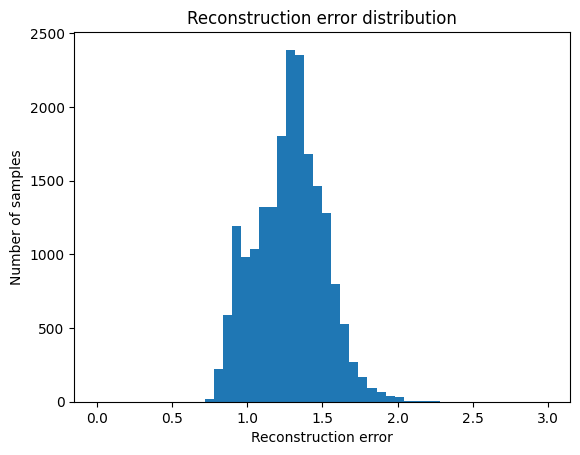

In [99]:

# 재구성 오류를 히스토그램으로 시각화
import matplotlib.pyplot as plt

# 재구성 오류 시각화 (테스트 데이터), 0-100 사이 값만 표시
plt.hist(reconstruction_errors, bins=50, range=(0, 3))
plt.xlabel('Reconstruction error')
plt.ylabel('Number of samples')
plt.title('Reconstruction error distribution')
plt.show()


In [100]:
# 재구성 오류 IQR
Q1 = np.percentile(reconstruction_errors, 25)
Q3 = np.percentile(reconstruction_errors, 75)
IQR = Q3 - Q1

# 이상치 경계값 계산
outlier_max = Q3 
outlier_max

1.5260846787861346

In [101]:
# 3분위 수만 따로 데이터프레임으로 추출 
train_3rd = train[reconstruction_errors > outlier_max]
train_3rd

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
3,56,10,7688,0,50,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,65,14,6514,0,35,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,22,10,594,0,25,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,32,13,13550,0,48,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
18,32,13,0,0,70,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22601,25,13,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22604,60,13,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22613,33,9,0,0,94,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22617,50,14,0,0,38,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [102]:
# 이상치 제거
train = train[reconstruction_errors <= outlier_max]

In [103]:
train

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,41,13,0,0,45,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,20,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,73,9,0,0,37,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,51,9,0,0,50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22614,28,9,0,0,36,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22615,44,9,0,0,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22616,22,10,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22619,35,13,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
# test 데이터에 대한 이상치 제거
unsupervised_model.fit(
    X_train=test.values,
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128,
    num_workers=0,
)


/opt/homebrew/Caskroom/miniforge/base/envs/sundo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 35.93402|  0:00:00s
epoch 1  | loss: 1.55207 |  0:00:00s
epoch 2  | loss: 1.08648 |  0:00:00s
epoch 3  | loss: 1.02942 |  0:00:01s
epoch 4  | loss: 0.99094 |  0:00:01s
epoch 5  | loss: 0.97391 |  0:00:01s
epoch 6  | loss: 0.89424 |  0:00:02s
epoch 7  | loss: 0.89832 |  0:00:02s
epoch 8  | loss: 0.87906 |  0:00:02s
epoch 9  | loss: 0.82965 |  0:00:03s
epoch 10 | loss: 0.81266 |  0:00:03s
epoch 11 | loss: 0.81906 |  0:00:03s
epoch 12 | loss: 0.80251 |  0:00:04s
epoch 13 | loss: 0.82333 |  0:00:04s
epoch 14 | loss: 0.78381 |  0:00:04s
epoch 15 | loss: 0.74291 |  0:00:05s
epoch 16 | loss: 0.77901 |  0:00:05s
epoch 17 | loss: 0.74768 |  0:00:05s
epoch 18 | loss: 0.78626 |  0:00:06s
epoch 19 | loss: 0.77882 |  0:00:06s
epoch 20 | loss: 0.73756 |  0:00:06s
epoch 21 | loss: 0.72239 |  0:00:07s
epoch 22 | loss: 0.72433 |  0:00:07s
epoch 23 | loss: 0.75542 |  0:00:07s
epoch 24 | loss: 0.70532 |  0:00:07s
epoch 25 | loss: 0.71679 |  0:00:08s
epoch 26 | loss: 0.71725 |  0:00:08s
e

In [104]:

reconstructed_X, embedded_X = unsupervised_model.predict(test.values)
reconstruction_errors = np.mean(np.abs(test - reconstructed_X), axis=1)


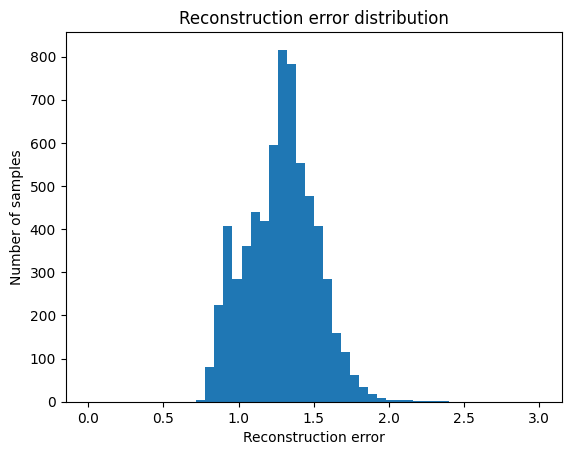

In [105]:

# 재구성 오류 시각화 (테스트 데이터), 0-100 사이 값만 표시

plt.hist(reconstruction_errors, bins=50, range=(0, 3))
plt.xlabel('Reconstruction error')
plt.ylabel('Number of samples')
plt.title('Reconstruction error distribution')
plt.show()




In [106]:
# 3분위 수 계산
Q1 = np.percentile(reconstruction_errors, 25)
Q3 = np.percentile(reconstruction_errors, 75)

# 이상치 경계값 계산
outlier_max = Q3
outlier_max

1.527003434256389

In [107]:
# 새로운 데이터 프레임 생성

test_3rd = test[reconstruction_errors > outlier_max]
test_3rd

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,45,12,0,2080,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,46,15,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
11,38,14,10520,0,50,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
13,61,4,0,0,50,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14,48,14,0,0,35,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7528,53,10,1471,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7529,39,14,7688,0,38,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7531,55,16,15024,0,30,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7534,50,15,0,0,50,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [108]:
# 원래의 test에서 이상치 제거
test = test[reconstruction_errors <= outlier_max]
# test 

In [109]:
test

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,22,9,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,39,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,35,15,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,40,13,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,51,9,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7535,21,10,0,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7536,20,10,0,0,20,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7537,52,9,0,0,50,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7538,50,10,0,0,45,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [205]:
# test에서 income 0,1 개수 비교
test['income'].value_counts()


0    4695
1     961
Name: income, dtype: int64

In [225]:
# lightgbm
import lightgbm as lgb

X_train = train.drop('income', axis=1)
y_train = train['income']

X_test = test.drop('income', axis=1)
y_test = test['income']

model = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.0056,

)

model.fit(X_train, y_train)

pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)



0.8741159830268741

In [226]:
# SMOTE
from imblearn.over_sampling import SMOTE

# train_3rd , test_3rd 데이터로 학습
X_train_3rd = train_3rd.drop('income', axis=1)
y_train_3rd = train_3rd['income']

X_test_3rd = test_3rd.drop('income', axis=1)
y_test_3rd = test_3rd['income']


smote = SMOTE(random_state=0)

X_train_over, y_train_over = smote.fit_resample(X_train_3rd, y_train_3rd)



In [227]:

model_3rd = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.005

)

model_3rd.fit(X_train_over, y_train_over)

pred_3rd = model_3rd.predict(X_test_3rd)

accuracy_score(y_test_3rd, pred_3rd)



0.8737400530503979

In [228]:
# pred, pred_3rd 합치고, y_test, y_test_3rd 합치기
pred_sum = np.concatenate([pred, pred_3rd])
y_test_sum = np.concatenate([y_test, y_test_3rd])

accuracy_score(y_test_sum, pred_sum)


0.8740220129956239